<a href="https://colab.research.google.com/github/kumar-06/Crypto-Dashboard/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/wuq7p3rc9wchuna/Covid_19.zip?dl=0

--2023-06-07 07:45:07--  https://www.dropbox.com/s/wuq7p3rc9wchuna/Covid_19.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wuq7p3rc9wchuna/Covid_19.zip [following]
--2023-06-07 07:45:07--  https://www.dropbox.com/s/raw/wuq7p3rc9wchuna/Covid_19.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb997a55494cefb08a94f11fd54.dl.dropboxusercontent.com/cd/0/inline/B9gQPkUz-jXex2yzvRFo3Nz5gvqgycM2yAJHKwzX6V6M24isG6ZDxJmM47n4aE1fhqMPjFD6kJ-3rA591x9o7wYWNtCskonmZNyTfFrKuQMIUEKWhF9gkfXhelLPfK8VcYQqDExL617G7JeKk9TefoRELGb-_vkiB6G62EzaiqffKA/file# [following]
--2023-06-07 07:45:08--  https://ucb997a55494cefb08a94f11fd54.dl.dropboxusercontent.com/cd/0/inline/B9gQPkUz-jXex2yzvRFo3Nz5gvqgycM2yAJHKwzX6V6M24isG6ZDxJmM47n4aE1fhqMPjFD6kJ-

In [ ]:
!unzip Covid_19.zip?dl=0

Archive:  Covid_19.zip?dl=0
   creating: Covid_19/Covid/
  inflating: Covid_19/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: Covid_19/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: Covid_19/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png  
  inflating: Covid_19/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png  
  inflating: Covid_19/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png  
  inflating: Covid_19/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png  
  inflating: Covid_19/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png  
  inflating: Covid_19/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png  
  inflating: Covid_19/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png  
  inflating: Covid_19/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4b.png  
  inflating: Covid_19/Covid/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg  

In [ ]:
import os
import shutil

In [ ]:
NEW_DIR="Covid_19/Train"
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)
  print("Train folder created")

Train folder created


In [ ]:

shutil.move("Covid_19/Normal",NEW_DIR)
shutil.move("Covid_19/Covid",NEW_DIR)

'Covid_19/Train/Covid'

In [ ]:
VAL_DIR="Covid_19/Val"
if not os.path.exists(VAL_DIR):
  os.mkdir(VAL_DIR)
  print("Validation folder created")

Validation folder created


In [ ]:
TARGET_DIR1="Covid_19/Val/Covid"
if not os.path.exists(TARGET_DIR1):
  os.mkdir(TARGET_DIR1)
TARGET_DIR2="Covid_19/Val/Normal"
if not os.path.exists(TARGET_DIR2):
  os.mkdir(TARGET_DIR2)
print("Creating the classes folder inside the Validation Folder")

Creating the classes folder inside the Validation Folder


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path1="Covid_19/Train"
path2="Covid_19/Train/Normal"
import splitfolders

In [ ]:
splitfolders.ratio(path1, 
                   output="cell_Covid", 
                   seed=42, 
                   ratio=(.8, .2), 
                   group_prefix=None,
                   move=True)

Copying files: 282 files [00:00, 10734.71 files/s]


In [ ]:
TRAINING_PATH="cell_Covid/train"
VALIDATION_PATH="cell_Covid/val"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#CNN BASED MODEL IN KERAS
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])




In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [ ]:
#TRAIN FROM SCRATCH
train_datagen=image.ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,

)
test_dataset=image.ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    'cell_Covid/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_dataset=image.ImageDataGenerator(rescale=1.0/255)

validation_generator=train_datagen.flow_from_directory(
    'cell_Covid/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 58 images belonging to 2 classes.


In [ ]:
hist= model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2,
    shuffle=True,
)

<ipython-input-41-1c0c74df0d56>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist= model.fit_generator(


Epoch 1/10
6/6 [==============================] - 12s 2s/step - loss: 0.2265 - accuracy: 0.9323 - val_loss: 0.1699 - val_accuracy: 0.9655
Epoch 2/10
6/6 [==============================] - 11s 2s/step - loss: 0.1917 - accuracy: 0.9323 - val_loss: 0.1566 - val_accuracy: 0.9483
Epoch 3/10
6/6 [==============================] - 12s 2s/step - loss: 0.1698 - accuracy: 0.9531 - val_loss: 0.0992 - val_accuracy: 0.9483
Epoch 4/10
6/6 [==============================] - 12s 2s/step - loss: 0.1422 - accuracy: 0.9427 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 10s 2s/step - loss: 0.1861 - accuracy: 0.9479 - val_loss: 0.1071 - val_accuracy: 0.9655
Epoch 6/10
6/6 [==============================] - 11s 2s/step - loss: 0.1099 - accuracy: 0.9531 - val_loss: 0.1090 - val_accuracy: 0.9655
Epoch 7/10
6/6 [==============================] - 11s 2s/step - loss: 0.1988 - accuracy: 0.9115 - val_loss: 0.1251 - val_accuracy: 0.9655
Epoch 8/10
6/6 [==================

<ipython-input-85-1e8190d05c7c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


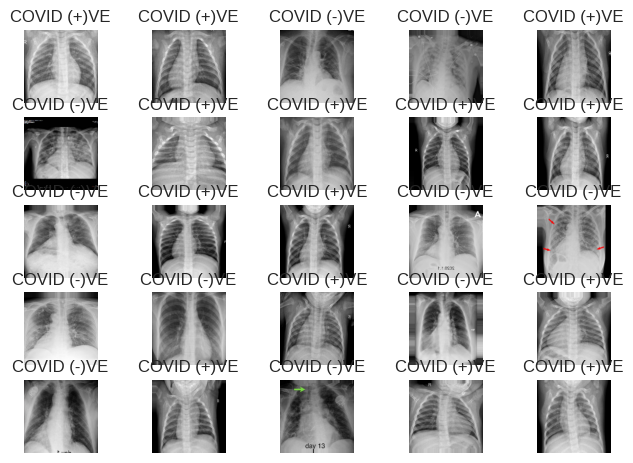

In [ ]:
#PLOTTING OUR RESULTS
plt.style.use('seaborn')
for (x,y) in train_generator:
  for i in range(25):
    plt.subplot(5,5,i+1)
    if(y[i]==1):
      plt.title("COVID (+)VE")
    else:
       plt.title("COVID (-)VE")
    plt.axis('off')
    plt.imshow(x[i])
  break

plt.show()